In [1]:
import matplotlib.pyplot as plt
from fredapi import Fred
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np


In [2]:
# Replace 'your_api_key' with your actual FRED API key
fred = Fred(api_key='ENTER API KEY HERE')

# Define the series IDs for 10-year Treasury constant maturity rate and current mortgage rate
ten_year_rate_id = 'DGS10'  # 10-year Treasury constant maturity rate
mortgage_rate_id = 'MORTGAGE30US'  # 30-year fixed rate mortgage average in the US


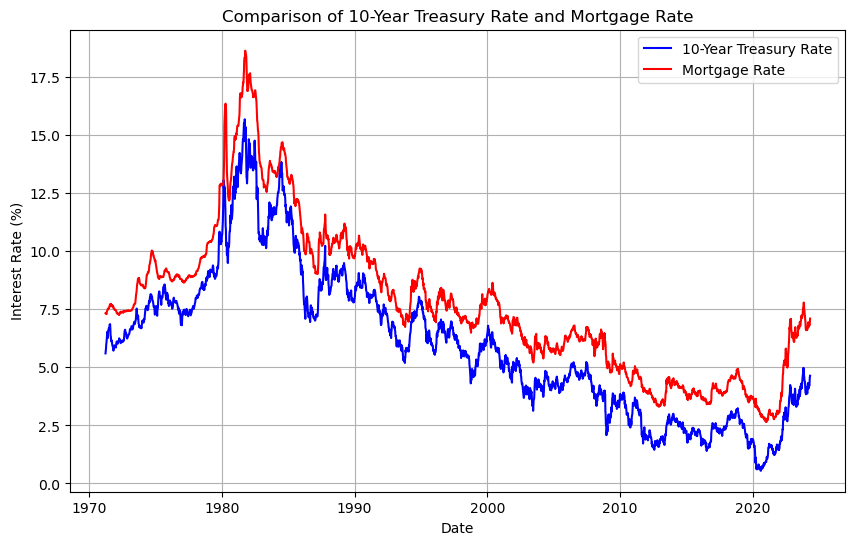

In [3]:
try:
    # Fetch data for 10-year Treasury constant maturity rate
    data_ten_year = fred.get_series(ten_year_rate_id)

    # Fetch data for current mortgage rate
    data_mortgage = fred.get_series(mortgage_rate_id)

    # Convert fetched data to DataFrames
    df_ten_year = pd.DataFrame(data_ten_year, columns=['10_year_rate'])
    df_mortgage = pd.DataFrame(data_mortgage, columns=['mortgage_rate'])

    # Merge DataFrames
    df = pd.concat([df_ten_year, df_mortgage], axis=1)

    # Drop rows with NaN values
    df.dropna(inplace=True)

    # Plot both rates on the same graph
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['10_year_rate'], color='blue', label='10-Year Treasury Rate')
    plt.plot(df.index, df['mortgage_rate'], color='red', label='Mortgage Rate')
    plt.title('Comparison of 10-Year Treasury Rate and Mortgage Rate')
    plt.xlabel('Date')
    plt.ylabel('Interest Rate (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

# data error check
except Exception as e:
    print("An error occurred:", str(e))

In [4]:
# Fetch data
data = fred.get_series('DGS10')
data.dropna(inplace=True)

# Data Preparation
df = pd.DataFrame(data, columns=['Yield'])
df['Year'] = df.index.year
yearly_data = df.groupby('Year').mean().reset_index()


In [5]:
# User Input for Number of Historical Years
num_years = int(input("Enter the number of historical years to use for regression: "))
max_year = yearly_data['Year'].max()
selected_data = yearly_data[yearly_data['Year'] > max_year - num_years]

# Regression Model
X = selected_data[['Year']]
y = selected_data['Yield']
model = LinearRegression()
model.fit(X, y)

# Prediction for the next year
current_year = X['Year'].iloc[-1]
next_year = pd.DataFrame([current_year + 1], columns=['Year'])  # Maintain feature names
next_year_yield = model.predict(next_year)[0]

print(f"The projected interest rate for the next year ({next_year['Year'].iloc[0]}) is {next_year_yield:.2f}%.")


Enter the number of historical years to use for regression:  20


The projected interest rate for the next year (2025) is 2.09%.


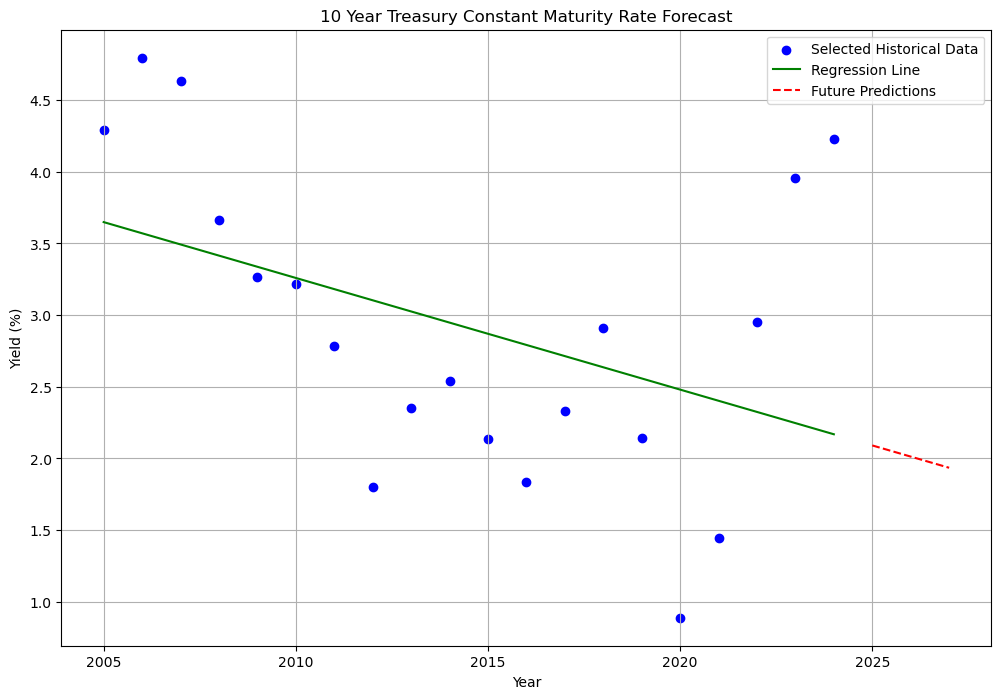

In [6]:
# Predict future values for graph
def predict_future_rates(years_ahead):
    future_years = pd.DataFrame([current_year + i for i in range(1, years_ahead + 1)], columns=['Year'])
    future_yields = model.predict(future_years)
    return future_years['Year'].values, future_yields

future_years, future_yields = predict_future_rates(3)

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(X['Year'], y, color='blue', label='Selected Historical Data')
plt.plot(X['Year'], model.predict(X), color='green', label='Regression Line')
plt.plot(future_years, future_yields, color='red', linestyle='--', label='Future Predictions')

plt.title('10 Year Treasury Constant Maturity Rate Forecast')
plt.xlabel('Year')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.show()